In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Flatten
from keras.optimizers import Adam
from keras import regularizers
from keras import optimizers
from keras import initializers
from keras.preprocessing import image

import keras.backend as K

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.patches as patches

Using TensorFlow backend.


In [2]:
# Read images
images = np.zeros((561,260,400))

for i in range(480):
    filename = 'dataOpenedEye/openedEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i] = img

for i in range(81):
    filename = 'dataPavel/pavelEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+480] = img    
    
images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 1))

# Rescale images
images = images/255.

images.shape

(561, 260, 400, 1)

In [ ]:
%matplotlib notebook
display = np.reshape(images[550], (260,400))
plt.imshow(display, cmap='gray')
plt.show()

In [3]:
# Read target values
target1 = pd.read_csv('dataOpenedEye/dataPupilCenter.csv')
target2 = pd.read_csv('dataPavel/pavelPupilCenter.csv')
target = [target1, target2]
target = pd.concat(target)

target.shape

(561, 3)

In [4]:
# Remove missing values
images = images[target.xcentral != '?']
target = target[target.xcentral != '?']
target = target.astype('float32')
target.shape

(527, 3)

In [5]:
# Put target data in shape
targetX = target['xcentral'].values.reshape((target['xcentral'].shape[0], 1))
targetY = target['ycentral'].values.reshape((target['ycentral'].shape[0], 1))

# Rescale targets between 0 and 1 
targetX = targetX/400.
targetY = targetY/260.

targetTrain = np.concatenate((targetX, targetY), axis=1)
targetTrain.shape

(527, 2)

In [6]:
# Shuffle data
xtrain, ytrain = shuffle(images, targetTrain, random_state=0)
xvalid = xtrain[512:]
xtrain = xtrain[:512]
yvalid = ytrain[512:]
ytrain = ytrain[:512]

In [7]:
def model(Xshape):
    
    mod = Sequential()
    mod.add(Conv2D(4, (7, 7), activation='relu', kernel_initializer='glorot_normal', input_shape=Xshape))
    mod.add(MaxPooling2D(pool_size=(4, 4)))
    
    mod.add(Conv2D(8, (7, 7), activation='relu', kernel_initializer='glorot_normal'))
    mod.add(MaxPooling2D(pool_size=(4, 4)))

    mod.add(Flatten())
#    mod.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.01)))
    mod.add(Dense(128, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0)))
#    mod.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0)))
    mod.add(Dense(2, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    return mod

In [8]:
mymodel = model(xtrain.shape[1:])
opt = optimizers.Adam(lr=0.0001)
mymodel.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

In [10]:
mymodel.fit(xtrain, ytrain, epochs = 40, batch_size=64)

Epoch 1/40
512/512 [==============================] - 20s 39ms/step - loss: 0.0304 - acc: 0.6465
Epoch 2/40
512/512 [==============================] - 20s 39ms/step - loss: 0.0266 - acc: 0.7949
Epoch 3/40
512/512 [==============================] - 20s 39ms/step - loss: 0.0219 - acc: 0.8594
Epoch 4/40
512/512 [==============================] - 20s 40ms/step - loss: 0.0177 - acc: 0.8965
Epoch 5/40
512/512 [==============================] - 20s 39ms/step - loss: 0.0153 - acc: 0.8691
Epoch 6/40
512/512 [==============================] - 20s 39ms/step - loss: 0.0133 - acc: 0.8965
Epoch 7/40
512/512 [==============================] - 20s 40ms/step - loss: 0.0119 - acc: 0.9141
Epoch 8/40
512/512 [==============================] - 20s 39ms/step - loss: 0.0108 - acc: 0.9238
Epoch 9/40
512/512 [==============================] - 21s 42ms/step - loss: 0.0100 - acc: 0.9238
Epoch 10/40
512/512 [==============================] - 21s 41ms/step - loss: 0.0092 - acc: 0.9336
Epoch 11/40
512/512 [========

In [ ]:
mymodel.fit(xtrain, ytrain, epochs = 10, batch_size=128)

In [11]:
# Make the prediction on all
ypredict = mymodel.predict(images)

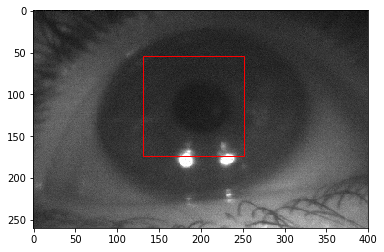

In [28]:
#%matplotlib notebook
index=390

display = np.reshape(images[index], (260,400))
box = ypredict[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [29]:
# Make the prediction for valid dataset
validPredict = mymodel.predict(xvalid)

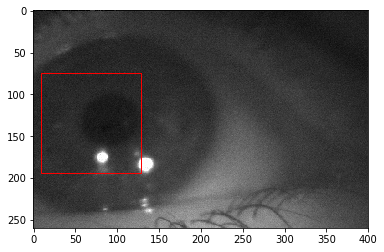

In [47]:
index=14

display = np.reshape(xvalid[index], (260,400))
box = validPredict[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()